In [92]:
import pandas as pd
import yfinance as yf

data = yf.download("CL=F", start="2023-01-01", end="2023-12-31")
# data.reset_index(level=1 , drop=True, inplace=True)
data.columns = data.columns.droplevel(1)
print(data.head())
data.to_csv('CrudeOil.csv')


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Date                                                                    
2023-01-03 00:00:00+00:00  76.930000  76.930000  81.500000  76.599998   
2023-01-04 00:00:00+00:00  72.839996  72.839996  77.419998  72.730003   
2023-01-05 00:00:00+00:00  73.669998  73.669998  74.919998  72.459999   
2023-01-06 00:00:00+00:00  73.769997  73.769997  75.470001  73.239998   
2023-01-09 00:00:00+00:00  74.629997  74.629997  76.739998  73.470001   

Price                           Open  Volume  
Date                                          
2023-01-03 00:00:00+00:00  80.570000  338520  
2023-01-04 00:00:00+00:00  77.250000  352434  
2023-01-05 00:00:00+00:00  73.250000  300731  
2023-01-06 00:00:00+00:00  73.970001  258128  
2023-01-09 00:00:00+00:00  73.470001  329290  


In [93]:
import pandas as pd

df = pd.read_csv('CrudeOil.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Adj Close  250 non-null    float64
 2   Close      250 non-null    float64
 3   High       250 non-null    float64
 4   Low        250 non-null    float64
 5   Open       250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [94]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Adj Close  250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [95]:
df['Date'] = pd.to_datetime(df['Date'])
df_chg= df.set_index(['Date'], drop=True)
df_chg = df_chg.tz_localize(None)
df_chg.head()

,Adj Close
Date,
2023-01-03,76.930000
2023-01-04,72.839996
2023-01-05,73.669998
2023-01-06,73.769997
2023-01-09,74.629997


<Axes: xlabel='Date'>

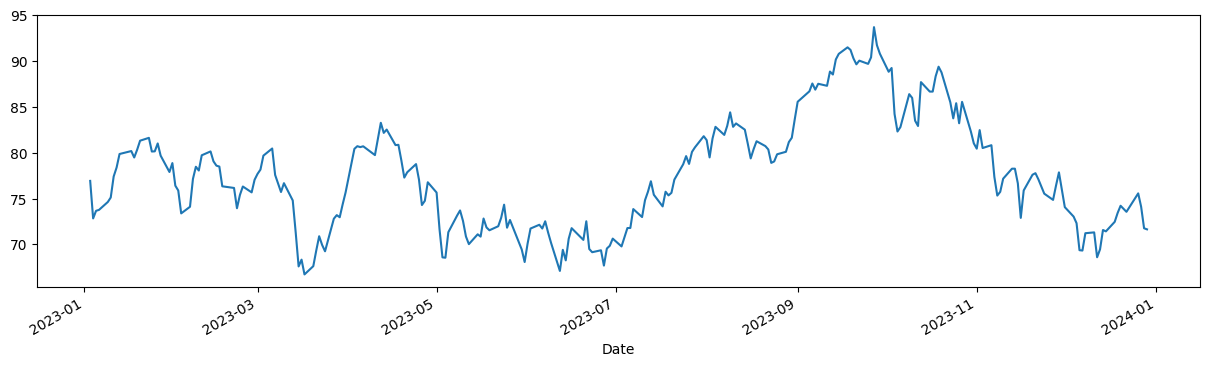

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
df_chg['Adj Close'].plot()

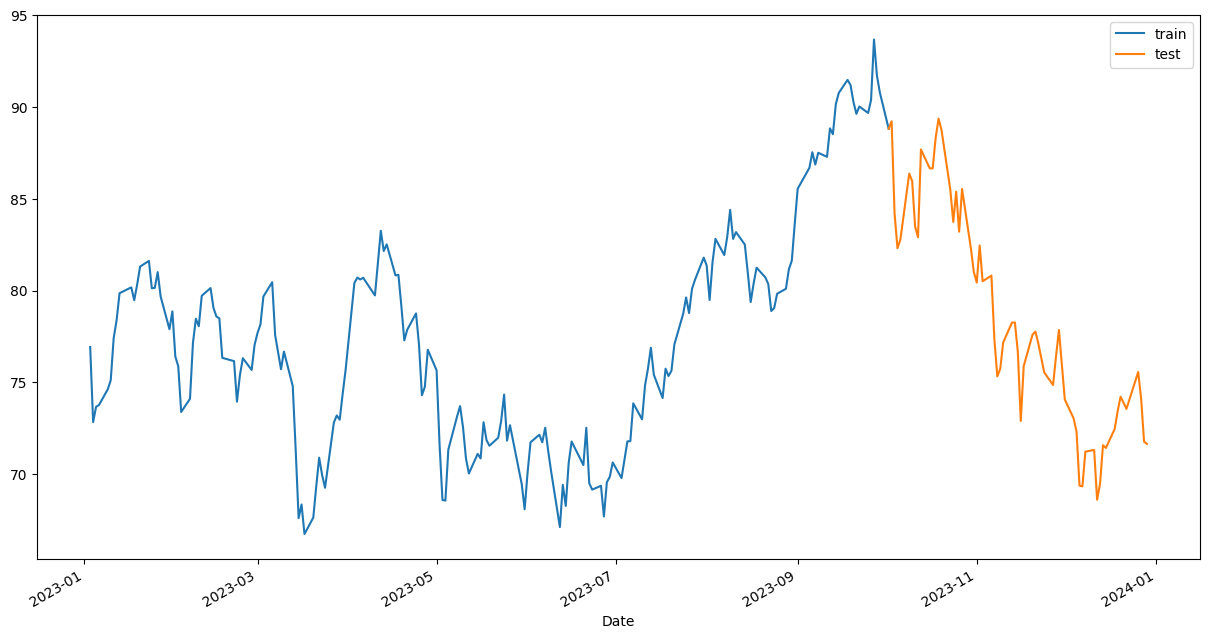

In [97]:
split_date = pd.Timestamp('2023-10-02')
df1 = df_chg['Adj Close']
train = df1.loc[:split_date]
test = df1.loc[split_date:]
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [98]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")

We have 188 train values
We have 63 test values


In [99]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:len(train):1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[len(train)-1:len(train)+len(test)-1:1]

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

In [101]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [102]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100


/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0588
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0169
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0169
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0167
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0165
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0164
Epoch 10/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0163
Epoch 11/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0163
Epoch 12/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0161
Epoch 13/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0161
Epoch 14/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160
Epoch 15/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step -

In [103]:
from sklearn.metrics import r2_score

y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
The R2 score on the Train set is:	0.924
The R2 score on the Test set is:	0.874


In [104]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)


for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [105]:
X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (187, 1, 1)
Test shape:  (62, 1, 1)


In [106]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2090
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1031
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0498
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0296
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0233
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0202
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0184
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0167
Epoch 10/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162
Epoch 11/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0156
Epoch 12/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154
Epoch 13/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0152
Epoch 14/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0151
Epoch 15/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1

In [107]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/stepWARNING:tensorflow:5 out of the last 19 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x144703f40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
The R2 score on the Train set is:	0.937
The R2 score on the Test set is:	0.891


In [108]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0285 
NN: 0.023613
LSTM: 0.020376


In [115]:
nn_y_pred_test = nn_model.predict([X_test])
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


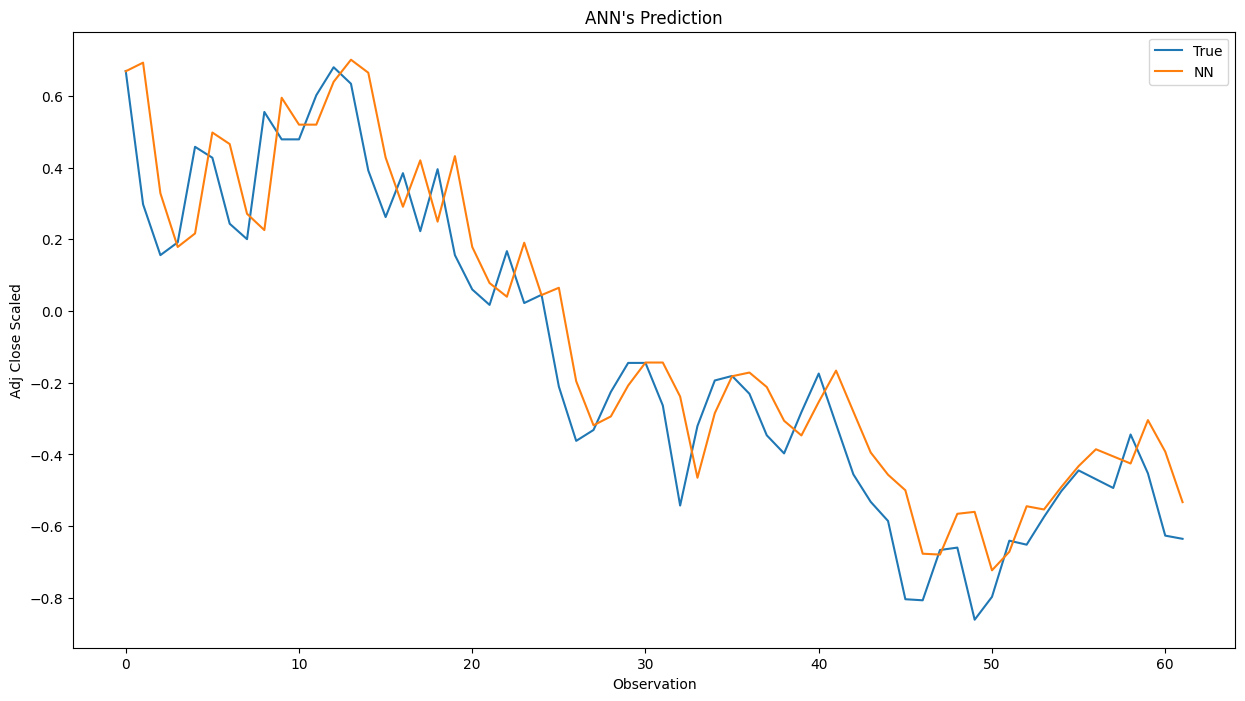

In [116]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

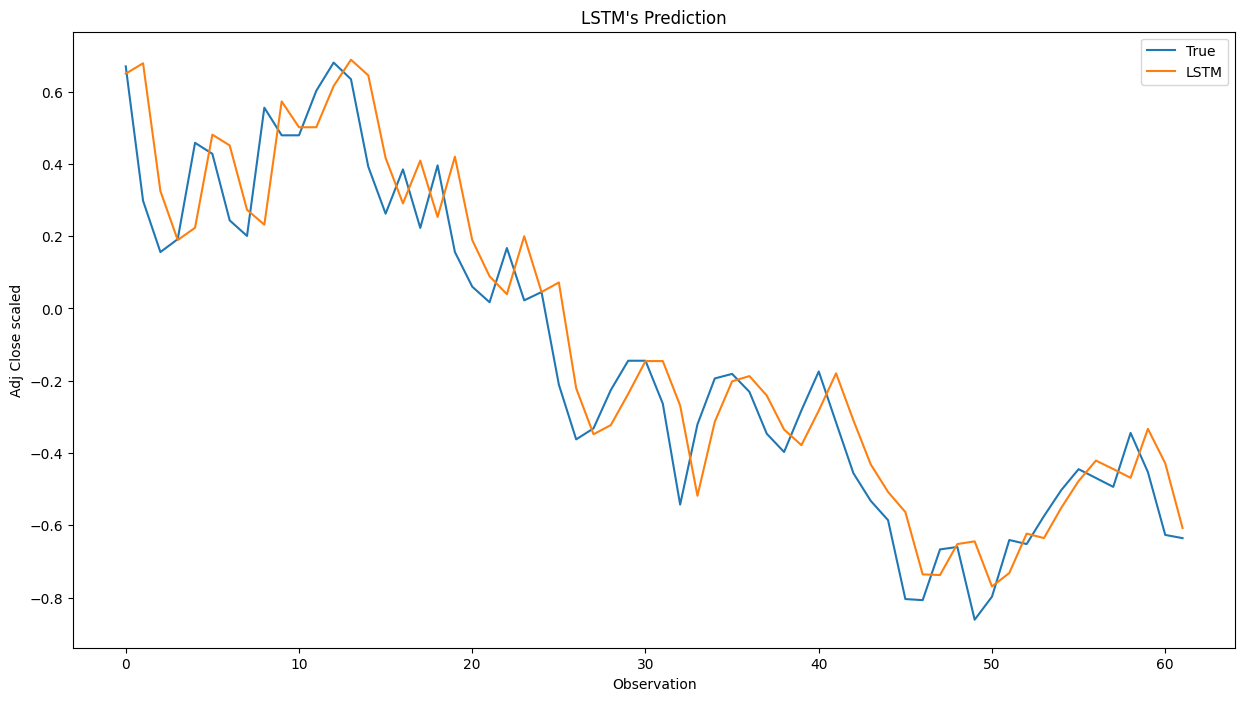

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(lstm_y_pred_test, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show()

In [118]:

# https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
X = seq.reshape(len(seq), 1, 1)
y = seq.reshape(len(seq), 1)
# define LSTM configuration
n_neurons = length
n_batch = length
n_epoch = 1000
# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=2)
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result:
	print('%.1f' % value)

/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1000
1/1 - 8s - 8s/step - loss: 0.2844
Epoch 2/1000
1/1 - 0s - 70ms/step - loss: 0.2822
Epoch 3/1000
1/1 - 0s - 52ms/step - loss: 0.2800
Epoch 4/1000
1/1 - 0s - 189ms/step - loss: 0.2778
Epoch 5/1000
1/1 - 0s - 124ms/step - loss: 0.2757
Epoch 6/1000
1/1 - 0s - 143ms/step - loss: 0.2735
Epoch 7/1000
1/1 - 0s - 149ms/step - loss: 0.2714
Epoch 8/1000
1/1 - 0s - 58ms/step - loss: 0.2693
Epoch 9/1000
1/1 - 0s - 116ms/step - loss: 0.2673
Epoch 10/1000
1/1 - 0s - 67ms/step - loss: 0.2652
Epoch 11/1000
1/1 - 0s - 90ms/step - loss: 0.2632
Epoch 12/1000
1/1 - 0s - 156ms/step - loss: 0.2612
Epoch 13/1000
1/1 - 0s - 51ms/step - loss: 0.2592
Epoch 14/1000
1/1 - 0s - 61ms/step - loss: 0.2572
Epoch 15/1000
1/1 - 0s - 384ms/step - loss: 0.2552
Epoch 16/1000
1/1 - 0s - 239ms/step - loss: 0.2533
Epoch 17/1000
1/1 - 0s - 84ms/step - loss: 0.2513
Epoch 18/1000
1/1 - 0s - 465ms/step - loss: 0.2494
Epoch 19/1000
1/1 - 0s - 129ms/step - loss: 0.2475
Epoch 20/1000
1/1 - 0s - 52ms/step - loss: 0.2

/var/folders/hv/t1mrtt815b713sd0fqxv51hm0000gn/T/ipykernel_3001/3908033096.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%.1f' % value)
